<a href="https://colab.research.google.com/github/polina-minaeva/loss-function-and-optimization/blob/main/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_%D0%B8_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Загрузка данных

In [ ]:
#1) Импортировала датасет с ирисами из библиотеки sklearn
from sklearn import datasets

In [ ]:
all_irises = datasets.load_iris()

In [ ]:
#2) импортировала пандас для отображения данных в виде таблицы

import pandas as pd

In [ ]:
df_irises = pd.DataFrame(all_irises.data, columns=all_irises.feature_names)
df_irises.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#3) Добавила в датафрейм столбец с данными целевой переменной

df_irises['target'] = all_irises.target

In [ ]:
df_irises

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
all_irises.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#4) Оставила в датафрейме только два цветка

two_irises = df_irises[~(df_irises['target'] == 0)]
two_irises.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
# Поменяла значение категориальных переменных в target для удобства

two_irises = two_irises.replace([1, 2],[0, 1])
two_irises.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


2. Реализация логистической регрессии

In [ ]:
#5) Добавила целевую переменную в y, признаки - в X

y = two_irises['target']
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target, Length: 100, dtype: int64

In [ ]:
X = two_irises[['petal length (cm)', 'sepal width (cm)']]
X

,petal length (cm),sepal width (cm)
50,4.7,3.2
51,4.5,3.2
52,4.9,3.1
53,4.0,2.3
54,4.6,2.8
...,...,...
145,5.2,3.0
146,5.0,2.5
147,5.2,3.0
148,5.4,3.4


In [ ]:
import numpy as np

In [ ]:
x_min, x_max = X.iloc[:,0].min() - .5, X.iloc[:,0].max() + .5
y_min, y_max = X.iloc[:,1].min() - .5, X.iloc[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

x_t = np.c_[xx.ravel(),yy.ravel()]

In [ ]:
X = np.c_[np.ones(len(X)), X]
X

array([[1. , 4.7, 3.2],
       [1. , 4.5, 3.2],
       [1. , 4.9, 3.1],
       [1. , 4. , 2.3],
       [1. , 4.6, 2.8],
       [1. , 4.5, 2.8],
       [1. , 4.7, 3.3],
       [1. , 3.3, 2.4],
       [1. , 4.6, 2.9],
       [1. , 3.9, 2.7],
       [1. , 3.5, 1. ],
       [1. , 4.2, 3. ],
       [1. , 4. , 2.2],
       [1. , 4.7, 2.9],
       [1. , 3.6, 2.9],
       [1. , 4.4, 3.1],
       [1. , 4.5, 3. ],
       [1. , 4.1, 2.7],
       [1. , 4.5, 2.2],
       [1. , 3.9, 2.5],
       [1. , 4.8, 3.2],
       [1. , 4. , 2.8],
       [1. , 4.9, 2.5],
       [1. , 4.7, 2.8],
       [1. , 4.3, 2.9],
       [1. , 4.4, 3. ],
       [1. , 4.8, 2.8],
       [1. , 5. , 3. ],
       [1. , 4.5, 2.9],
       [1. , 3.5, 2.6],
       [1. , 3.8, 2.4],
       [1. , 3.7, 2.4],
       [1. , 3.9, 2.7],
       [1. , 5.1, 2.7],
       [1. , 4.5, 3. ],
       [1. , 4.5, 3.4],
       [1. , 4.7, 3.1],
       [1. , 4.4, 2.3],
       [1. , 4.1, 3. ],
       [1. , 4. , 2.5],
       [1. , 4.4, 2.6],
       [1. , 4.6

In [ ]:
#6) Создала функцию sigmoid для реализации логистической регрессии, а также функцию logloss для построения функции потерь и функцию gr_logloss - для градиента

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_0 + logloss_1) / len(y)
    return logloss_total


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#7) Визуализировала процесс логистической регрессии с помощью функционала matplotlib

def visualize(W):
    x_t_ones = np.c_[np.ones(x_t.shape[0]), x_t]

    y_proba = sigmoid(x_t_ones @ W)
    Z = np.where(y_proba >= 0.5, 1, 0)

    Z = Z.reshape(xx.shape)

    plt.figure(1, figsize=(8,8))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], edgecolors='k')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], edgecolors='k')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.show()

Итерация: 0
Logloss 0.5169564220662504
Accuracy 0.82
--------------------------------------------------------


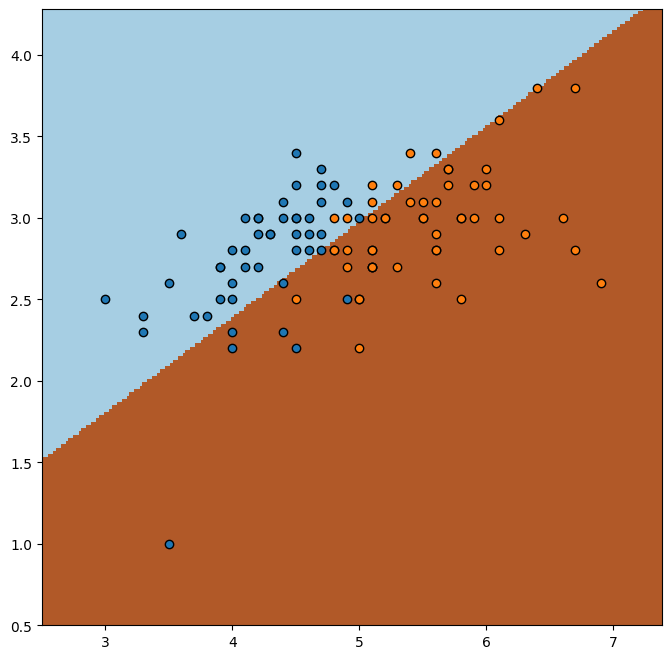

Итерация: 60
Logloss 6.259902117449541
Accuracy 0.5
--------------------------------------------------------


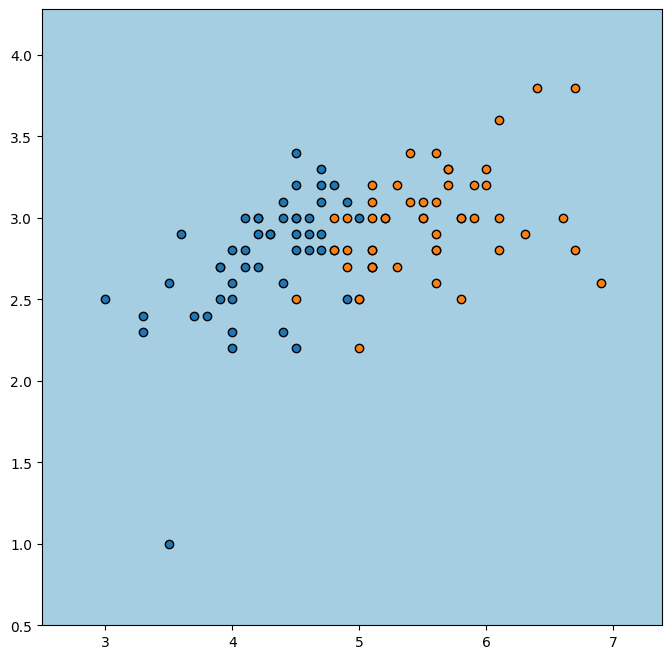

Итерация: 120
Logloss 12.719177323331714
Accuracy 0.5
--------------------------------------------------------


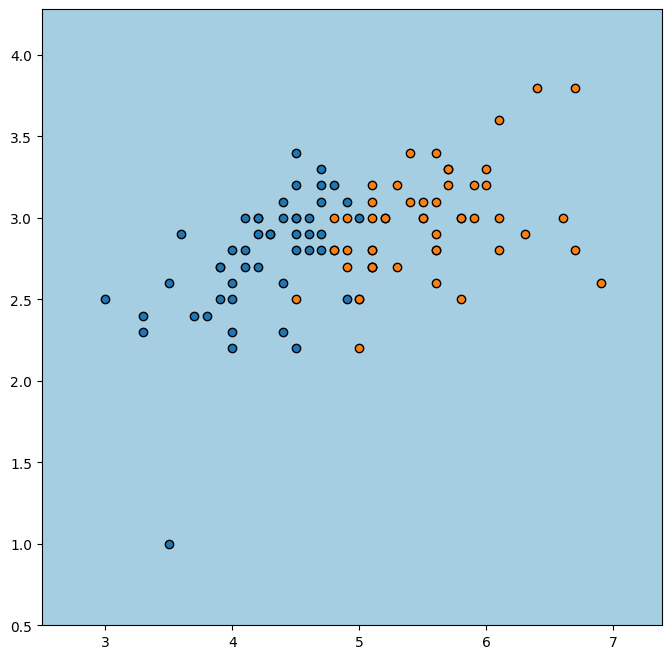

Итерация: 180
Logloss 28.85336492517051
Accuracy 0.5
--------------------------------------------------------


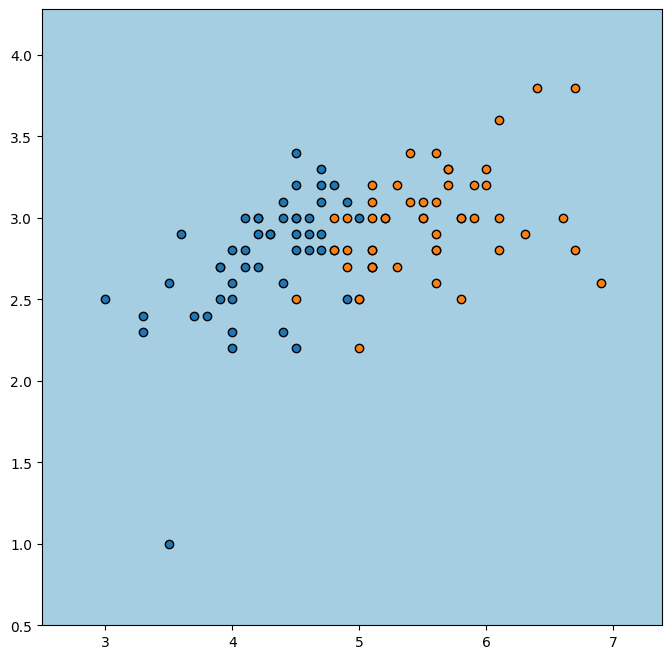

Итерация: 240
Logloss 34.538776394910684
Accuracy 0.5
--------------------------------------------------------


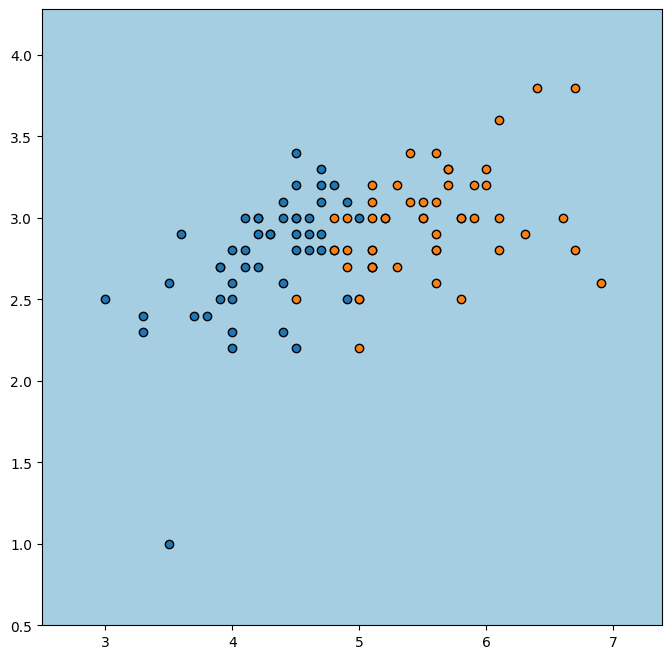

In [ ]:
#установка минимального значения, на которое должны изменяться веса
eps = 0.0001

#первоначальная точка
np.random.seed(8)
W = np.random.randn(X.shape[1])

#размер шага
learning_rate = 0.001

next_W = W

#количество итераций
n = 250
for i in range(n):
    cur_W = next_W

    #движение в негативную сторону вычисляемого градиента
    next_W = cur_W - learning_rate * gr_logloss(X, W, y)

    #остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 60 == 0:
        print(f"Итерация: {i}")
        #print(f"Текущая точка {cur_W}| Следующая точка {next_W}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------")

        visualize(next_W)

In [ ]:
next_W

array([ 0.90771076, 10.79459294,  2.29841576])

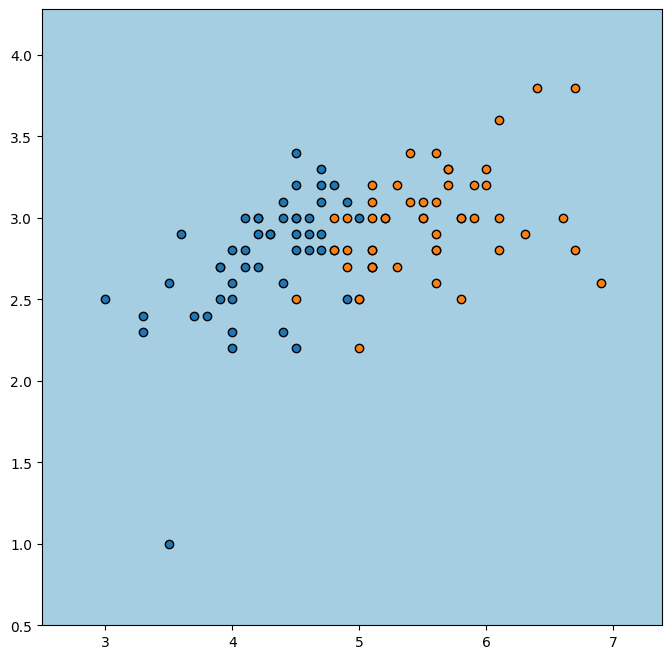

In [ ]:
visualize(next_W)